# Examen final de Desarrollo de Aplicaciones para la Visualización de Datos

Nombre: Lorenzo 

Apellidos: Colino Hernández

Tiempo: 2 horas y 30 minutos

## Contexto del ejercicio

El Ayuntamiento de Madrid desea entender en más detalle la situación del problema habitacional en la ciudad de Madrid basada en múltiples fuentes de datos como alquiler vacacional, evolución del precio de alquiler, inflacción y densidad poblacional.

El objetivo del análisis es buscar patrones para entender mejor que está sucediendo, que barrios son los más estresados y que factores son que hacen que el precio de la vivienda esté en máximos. Por lo tanto, se pide:

1. Realizar un análisis descriptivo de los datos con al menos 6 visualizaciones diferentes. (3 Puntos)
2. Realizar un modelo de regresión lineal que explique (mostrar coeficientes) la dinámica del precio de la vivienda en base a los datos de alquiler vacacional a nivel agregado, no por barrio. (2 Puntos)
3. Montar un dashboard con 4 visualizaciones diferentes cómo mínimo. (2 Punto)
4. Concluir todo este análisis haciendo un informe con 2 páginas como mínimo que incluya, preguntas que se van a responder, dashboard resumen que sustente las preguntas y recomendaciones para mejorar la situación habitacional a partir de los resultados obtenidos de los análisis realizados con los datos. (3 Puntos)

## Juego de datos

Para realizar este análisis se provee un juego de datos con las siguientes variables:


| **Variable**           | **Descripción**                                                                                     | **Tipo**                 |
|-------------------------|-----------------------------------------------------------------------------------------------------|--------------------------|
| `neighbourhood_group`   | Grupo de vecindarios o distritos en Madrid.                                                        | Categórica               |
| `date`                 | Fecha de la observación en formato `YYYY-MM-DD`.                                                   | Temporal                 |
| `m2_price`             | Precio promedio por metro cuadrado en euros.                                                       | Cuantitativa continua     |
| `inflation`            | Inflación mensual como porcentaje (incremento en los precios al consumidor).                       | Cuantitativa continua     |
| `HICP`                 | Índice armonizado de precios al consumidor (indicador de inflación en la zona euro).               | Cuantitativa continua     |
| `population_density`   | Densidad de población anual por km² para toda la Comunidad de Madrid.                                                  | Cuantitativa continua     |
| `listings_count`       | Número total de propiedades listadas en Airbnb en un vecindario.                                   | Cuantitativa discreta     |
| `minimum_nights`       | Número mínimo de noches requerido para alquilar una propiedad.                                     | Cuantitativa discreta     |
| `nigth_price`          | Precio promedio por noche de las propiedades en Airbnb.                                            | Cuantitativa continua     |
| `availability_365`     | Número de días al año que una propiedad está disponible para alquilarse.                           | Cuantitativa discreta     |
| `listing_reviews`      | Número promedio de reseñas por propiedad listada.                                                 | Cuantitativa continua     |
| `number_of_reviews`    | Total acumulado de reseñas para todas las propiedades en un vecindario.                            | Cuantitativa discreta     |
| `reviews_per_month`    | Número promedio de reseñas recibidas por una propiedad al mes.                                     | Cuantitativa continua     |
| `hosts_count`          | Número de anfitriones activos en un vecindario.                                                   | Cuantitativa discreta     |
| `Private_room`         | Número de propiedades que ofrecen habitaciones privadas.                                           | Cuantitativa discreta     |
| `Entire_home`          | Número de propiedades que ofrecen viviendas completas.                                             | Cuantitativa discreta     |
| `Hotel_room`           | Número de propiedades categorizadas como habitaciones de hotel.                                    | Cuantitativa discreta     |
| `Shared_room`          | Número de propiedades que ofrecen habitaciones compartidas.                                        | Cuantitativa discreta     |


Ejemplos de preguntas que se pueden realizar a los datos:
1. ¿Cuál es el precio promedio del metro cuadrado (m2_price) por neighbourhood_group y cómo ha cambiado con el tiempo (date)?
2. ¿Existe una correlación entre el precio por metro cuadrado (m2_price) y la densidad de población (population_density)?
3. ¿Qué patrones estacionales se pueden identificar en las reseñas mensuales (reviews_per_month) o en la disponibilidad anual (availability_365)?
4. ¿Qué vecindarios tienen el mayor número de anfitriones (hosts_count) y cómo se relaciona con el precio de la vivienda?
5. ¿Qué vecindarios muestran el mayor crecimiento en precios (m2_price o nigth_price) entre años (year)?
6. ¿Qué factores (e.g., inflation, availability_365, population_density) explican mejor las variaciones en el precio por metro cuadrado (m2_price) o el precio por noche (nigth_price)?

Nota:
- Puedes hacer group_by para sacar variables agregadas por fecha.
- Se valorará la creatividad en las hipótesis, soluciones y limpieza del código y visualizaciones.

## Entrega del exámen

Compartir Url de github con:
- notebook que responde a las preguntas 1, 2 y 3
- PDF respondiendo a la pregunta 4

Puedes entregar el exámen en el siguiente enlace:

https://forms.gle/xe3En2raC3C3UUY39


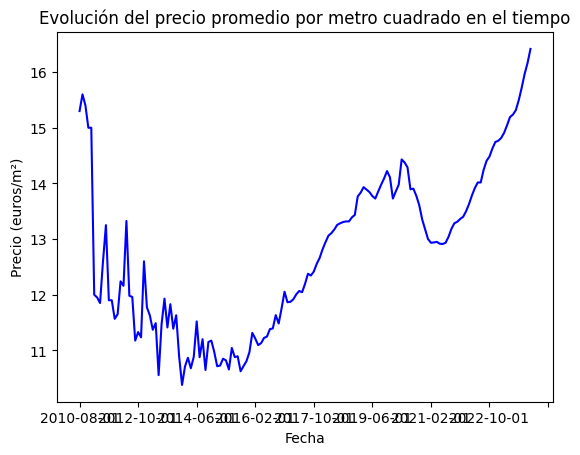

In [75]:

import pandas as pd
import matplotlib.pyplot as plt


from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error



df = pd.read_csv('housing_time_series_by_madrid_neighbourhood.csv')

# Visualización 2: Evolución del precio promedio por metro cuadrado (m2_price) en el tiempo en euros
# Se puede observar una evolución de los precios durante el tiempo, el dataset incluye instancias desde 2010, se puede observar como los precios bajaron por la crisis
# Pero desde el bajon se aprecia una importante subida, que corrobora que efectivamente los precios están subiendo

df.groupby('date')['m2_price'].mean().plot(kind='line', color='blue')
plt.title('Evolución del precio promedio por metro cuadrado en el tiempo')
plt.xlabel('Fecha')
plt.ylabel('Precio (euros/m²)')
plt.show()




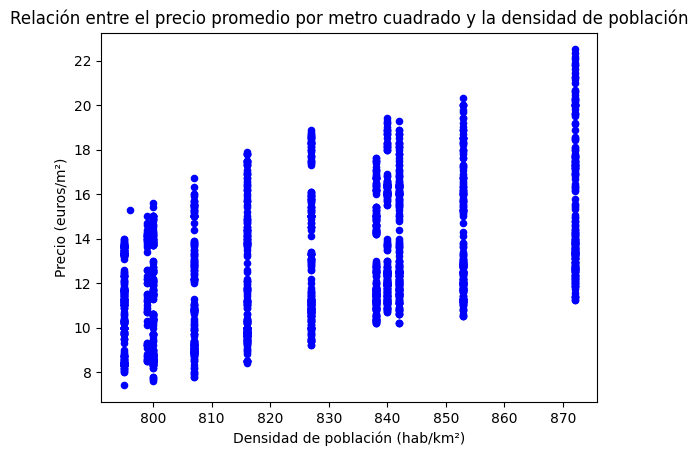

In [76]:


df.plot(kind='scatter', x='population_density', y='m2_price', color='blue')
plt.title('Relación entre el precio promedio por metro cuadrado y la densidad de población')
plt.xlabel('Densidad de población (hab/km²)')
plt.ylabel('Precio (euros/m²)')
plt.show()

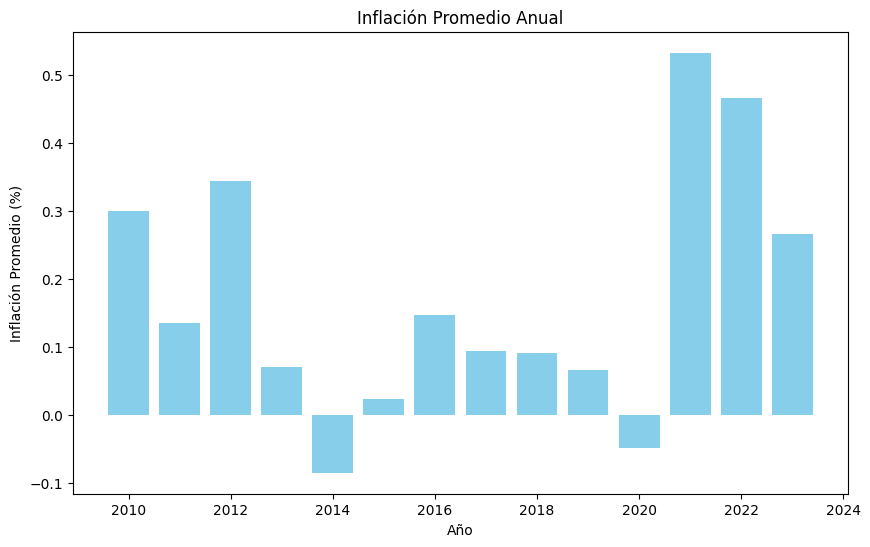

In [77]:
df['year'] = pd.to_datetime(df['date']).dt.year

avg_inflation_by_year = df.groupby('year')['inflation'].mean().reset_index()

plt.figure(figsize=(10, 6))
plt.bar(avg_inflation_by_year['year'], avg_inflation_by_year['inflation'], color='skyblue')
plt.title('Inflación Promedio Anual')
plt.xlabel('Año')
plt.ylabel('Inflación Promedio (%)')
plt.show()

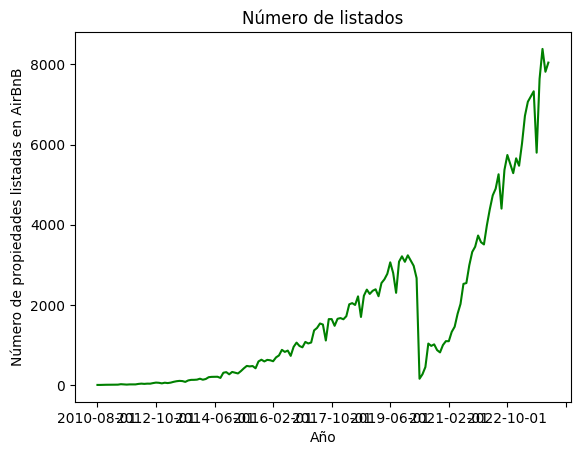

In [78]:
#Número total de propiedades listadas en Airbnb en un vecindario
df.groupby('date')['listings_count'].sum().plot(kind='line', color='green')
plt.title('Número de listados')
plt.xlabel('Año')
plt.ylabel('Número de propiedades listadas en AirBnB')
plt.show()

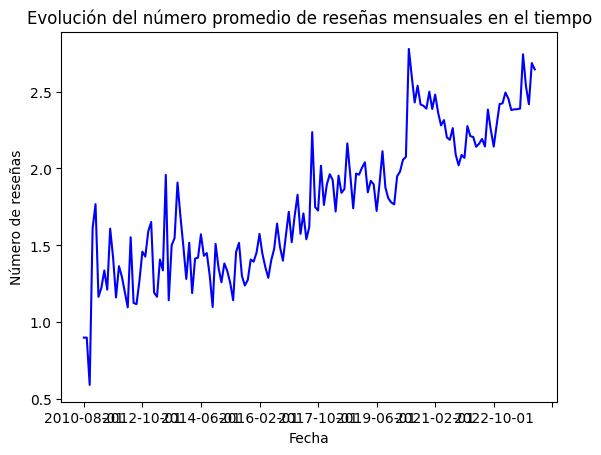

In [79]:
df.groupby('date')['reviews_per_month'].mean().plot(kind='line', color='blue')
plt.title('Evolución del número promedio de reseñas mensuales en el tiempo')
plt.xlabel('Fecha')
plt.ylabel('Número de reseñas')
plt.show()

In [80]:
# Relación entre el entre el número de anfitriones y el precio

In [97]:
X = df[['inflation', 'HICP', 'population_density', 'listings_count', 'availability_365', 'minimum_nights', 'nigth_price', 'listing_reviews', 'number_of_reviews', 'reviews_per_month']]
y = df['m2_price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

coeficientes = pd.DataFrame(model.coef_, X.columns, columns=['Coeficiente'])
print(coeficientes)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Error cuadrático medio: {mse:.2f}')

                    Coeficiente
inflation              0.033486
HICP                  -0.018023
population_density     0.070501
listings_count         0.012178
availability_365       0.001116
minimum_nights        -0.010575
nigth_price            0.009976
listing_reviews       -0.002698
number_of_reviews      0.011595
reviews_per_month     -1.093030
Error cuadrático medio: 4.52


Precio promedio por vecindario:
neighbourhood_group
Arganzuela            13.823507
Barajas               11.194508
Carabanchel           10.881736
Centro                16.231677
Chamartín             15.048115
Chamberí              16.279343
Ciudad Lineal         12.453770
Hortaleza             11.935000
Latina                10.803206
Moratalaz             10.579722
Puente de Vallecas    11.004237
Retiro                14.442734
Salamanca             16.915515
Tetuán                14.246279
Usera                 10.917080
Vicálvaro             10.347778
Villa de Vallecas     11.041978
Villaverde            10.023661
Name: m2_price, dtype: float64


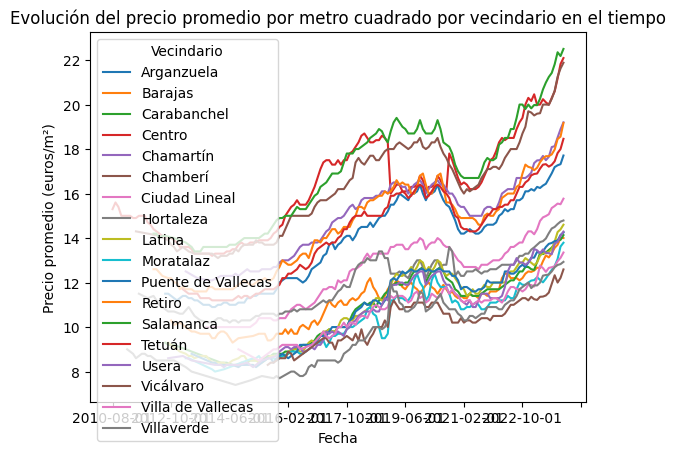

In [ ]:

avg_price_by_neighbourhood = df.groupby('neighbourhood_group')['m2_price'].mean()
print("Precio promedio por vecindario:") 
print(avg_price_by_neighbourhood)

df.groupby(['date', 'neighbourhood_group'])['m2_price'].mean().unstack().interpolate(method='linear').plot(kind='line')
plt.title('Evolución del precio promedio por metro cuadrado por vecindario en el tiempo')
plt.xlabel('Fecha')
plt.ylabel('Precio promedio (euros/m²)')
plt.legend(title='Vecindario')
plt.show()




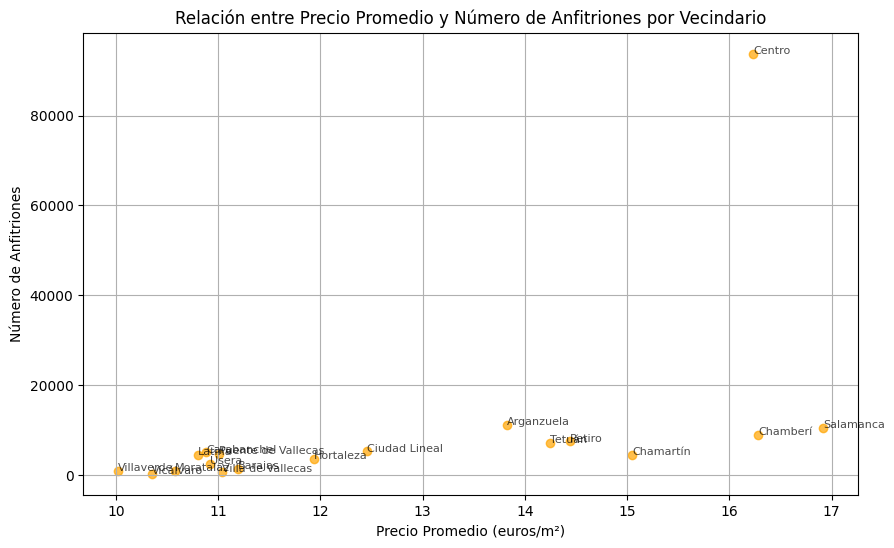

In [99]:
avg_price_and_hosts = df.groupby('neighbourhood_group').agg({'m2_price': 'mean', 'hosts_count': 'sum'}).reset_index()

plt.figure(figsize=(10, 6))
plt.scatter(avg_price_and_hosts['m2_price'], avg_price_and_hosts['hosts_count'], alpha=0.7, color='orange')
plt.title('Relación entre Precio Promedio y Número de Anfitriones por Vecindario')
plt.xlabel('Precio Promedio (euros/m²)')
plt.ylabel('Número de Anfitriones')

for i, txt in enumerate(avg_price_and_hosts['neighbourhood_group']):
    plt.annotate(txt, (avg_price_and_hosts['m2_price'][i], avg_price_and_hosts['hosts_count'][i]), fontsize=8, alpha=0.7)

plt.grid(True)
plt.show()

# Librerías necesarias



In [100]:
import pandas as pd
import matplotlib.pyplot as plt


from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error